# Analyse Std Dev Markit

In [142]:
# import des libs
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
from os import *
from os.path import *
import xlwings as xw
from xlwings import Range 

In [143]:
os.chdir(r'C:\Users\rmolli\Desktop\Power-Europe\Data')
data = pd.read_csv(r"Data Mark-It Raw 04.csv")
data = data[['ns1:ValuationDate','ns1:Currency',
       'ns1:Underlying', 'ns1:Underlying1', 'ns1:Underlying2', 
       'ns1:ClientPrice', 'ns1:CompositePrice', 'ns1:ConsensusPrice',
       'ns1:EndDate',
       'ns1:KurtosisPrice', 'ns1:NumberAcceptedPrice',
       'ns1:Period','ns1:RangePrice', 'ns1:SkewnessPrice',
       'ns1:StandardDeviationPrice', 'ns1:StartDate']]


## Germany Base Load Analysis

In [144]:
short_term = ['2022-05-31 00:00:00', '2022-06-30 00:00:00',
       '2022-07-31 00:00:00', '2022-08-31 00:00:00',
       '2022-09-30 00:00:00', '2022-10-31 00:00:00',
       '2022-11-30 00:00:00', '2022-12-31 00:00:00',
     ]

long_term = ['2023-01-31 00:00:00', '2023-02-28 00:00:00',
       '2023-03-31 00:00:00', '2023-04-30 00:00:00',
       '2023-05-31 00:00:00', '2023-06-30 00:00:00',
       '2023-07-31 00:00:00', '2023-08-31 00:00:00',
       '2023-09-30 00:00:00', '2023-10-31 00:00:00',
       '2023-11-30 00:00:00', '2023-12-31 00:00:00',
       '2024-01-31 00:00:00', '2024-02-29 00:00:00',
       '2024-03-31 00:00:00', '2024-04-30 00:00:00',
       '2024-05-31 00:00:00', '2024-06-30 00:00:00',
       '2024-07-31 00:00:00', '2024-08-31 00:00:00',
       '2024-09-30 00:00:00', '2024-10-31 00:00:00',
       '2024-11-30 00:00:00', '2024-12-31 00:00:00',
       '2025-01-31 00:00:00', '2025-02-28 00:00:00',
       '2025-03-31 00:00:00', '2025-04-30 00:00:00',
       '2025-05-31 00:00:00', '2025-06-30 00:00:00',
       '2025-07-31 00:00:00', '2025-08-31 00:00:00',
       '2025-09-30 00:00:00', '2025-10-31 00:00:00',
       '2025-11-30 00:00:00', '2025-12-31 00:00:00',
       '2026-01-31 00:00:00', '2026-02-28 00:00:00',
       '2026-03-31 00:00:00', '2026-04-30 00:00:00',
       '2026-05-31 00:00:00', '2026-06-30 00:00:00',
       '2031-07-31 00:00:00', '2031-08-31 00:00:00',
       '2031-09-30 00:00:00', '2031-10-31 00:00:00',
       '2031-11-30 00:00:00', '2031-12-31 00:00:00',
       '2032-01-31 00:00:00', '2032-02-29 00:00:00',
       '2032-03-31 00:00:00', '2032-04-30 00:00:00']

### Calcul Divers

In [145]:
data_ger_BL= data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate'] == '2023-01-31 00:00:00' ) ,:]
print(data_ger_BL["ns1:StandardDeviationPrice"].max())
print(data_ger_BL["ns1:StandardDeviationPrice"].min())
print(round(data_ger_BL["ns1:StandardDeviationPrice"].mean(),2))

4.42666894
1.82785246
3.46


In [146]:
data_ger_BL= data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate'].isin(short_term) ) ,:]
print(data_ger_BL["ns1:StandardDeviationPrice"].max())
print(data_ger_BL["ns1:StandardDeviationPrice"].min())
print(round(data_ger_BL["ns1:StandardDeviationPrice"].mean(),2))

6.80182462
0.12639618
1.85


In [147]:
data_ger_BL

,ns1:ValuationDate,ns1:Currency,ns1:Underlying,ns1:Underlying1,ns1:Underlying2,ns1:ClientPrice,ns1:CompositePrice,ns1:ConsensusPrice,ns1:EndDate,ns1:KurtosisPrice,ns1:NumberAcceptedPrice,ns1:Period,ns1:RangePrice,ns1:SkewnessPrice,ns1:StandardDeviationPrice,ns1:StartDate
1530,2022-04-07 00:00:00,EUR,GERMAN POWER - BASELOAD,GERMAN POWER - BASELOAD,NaN,225.500000,225.017982,225.085469,2022-05-31 00:00:00,-0.651337,14.0,Month,1.070000,-0.621320,0.339861,2022-05-01 00:00:00
1531,2022-04-07 00:00:00,EUR,GERMAN POWER - BASELOAD,GERMAN POWER - BASELOAD,NaN,239.000000,239.945477,239.925813,2022-06-30 00:00:00,-0.318241,15.0,Month,1.200000,-0.274308,0.322617,2022-06-01 00:00:00
1532,2022-04-07 00:00:00,EUR,GERMAN POWER - BASELOAD,GERMAN POWER - BASELOAD,NaN,245.071531,245.426178,245.432056,2022-07-31 00:00:00,-1.336277,15.0,Month,1.250000,0.514360,0.457526,2022-07-01 00:00:00
1533,2022-04-07 00:00:00,EUR,GERMAN POWER - BASELOAD,GERMAN POWER - BASELOAD,NaN,242.291532,240.746411,240.718474,2022-08-31 00:00:00,-0.902442,15.0,Month,4.482817,-0.297384,1.337445,2022-08-01 00:00:00
1534,2022-04-07 00:00:00,EUR,GERMAN POWER - BASELOAD,GERMAN POWER - BASELOAD,NaN,266.124835,268.050335,268.032292,2022-09-30 00:00:00,-1.581103,15.0,Month,4.982329,-0.207953,1.808361,2022-09-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51103,2022-04-29 00:00:00,EUR,GERMAN POWER - BASELOAD,GERMAN POWER - BASELOAD,NaN,248.366624,248.653733,248.438042,2022-12-31 00:00:00,2.349961,12.0,Month,7.710501,1.569072,1.911297,2022-12-01 00:00:00
51216,2022-04-29 00:00:00,EUR,GERMAN POWER - BASELOAD,GERMAN POWER - BASELOAD,NaN,205.967213,204.787488,204.367444,2022-06-30 00:00:00,-0.158813,14.0,BO Quarter,4.549590,0.978059,1.347488,2022-05-01 00:00:00
51217,2022-04-29 00:00:00,EUR,GERMAN POWER - BASELOAD,GERMAN POWER - BASELOAD,NaN,230.000000,229.293702,228.830603,2022-09-30 00:00:00,-1.089994,14.0,Quarter,2.250000,0.408906,0.765846,2022-07-01 00:00:00
51218,2022-04-29 00:00:00,EUR,GERMAN POWER - BASELOAD,GERMAN POWER - BASELOAD,NaN,253.000000,253.280397,252.960612,2022-12-31 00:00:00,0.728838,13.0,Quarter,1.473754,-0.871312,0.391799,2022-10-01 00:00:00


### Analyse Quarters

In [148]:
quarters = data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:Period'] == 'Quarter' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Ger_quarters = pd.DataFrame(columns = quarters, index = ['Min', 'Average', 'Max', 'Nb of Prices'] )

for j in np.arange(0,recap_Ger_quarters.shape[1]):
        recap_Ger_quarters.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Ger_quarters.shape[1]):
        recap_Ger_quarters.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Ger_quarters.shape[1]):
        recap_Ger_quarters.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Ger_quarters.shape[1]):
        recap_Ger_quarters.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_quarters.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)


recap_Ger_quarters.dropna(inplace = True, axis='columns' )
recap_Ger_quarters

,2022-09-30 00:00:00,2022-12-31 00:00:00,2023-03-31 00:00:00,2023-06-30 00:00:00,2023-09-30 00:00:00,2023-12-31 00:00:00,2024-03-31 00:00:00,2024-06-30 00:00:00,2024-09-30 00:00:00,2024-12-31 00:00:00,...,2026-09-30 00:00:00,2026-12-31 00:00:00,2027-03-31 00:00:00,2027-06-30 00:00:00,2027-09-30 00:00:00,2027-12-31 00:00:00,2028-03-31 00:00:00,2028-06-30 00:00:00,2028-09-30 00:00:00,2028-12-31 00:00:00
Min,0.28,0.25,0.38,0.4,0.58,0.11,1.32,0.69,1.25,0.07,...,0.76,0.18,2.72,1.1,1.29,0.28,2.6,0.96,1.66,0.56
Average,2.19,1.52,2.45,1.67,1.61,1.57,3.62,1.8,2.61,1.84,...,2.09,0.98,4.93,2.22,2.44,1.17,4.08,2.11,2.45,1.46
Max,6.8,5.35,6.55,4.08,3.73,5.71,8.21,2.86,3.98,4.41,...,3.1,2.2,7.72,3.39,3.52,2.75,5.72,3.49,3.48,2.78
Nb of Prices,15.13,15.13,13.87,13.37,13.2,13.58,11.93,11.87,11.83,12.62,...,7.0,7.87,6.33,5.87,5.87,6.31,4.83,4.83,4.83,5.33


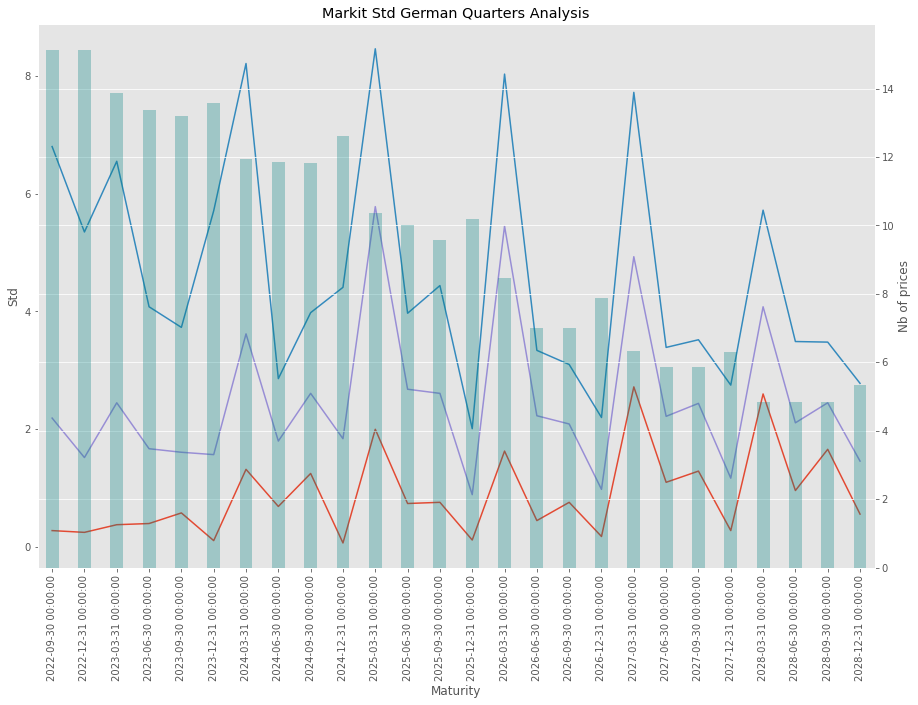

In [150]:
plt.figure(figsize=(15, 10))
plt.title("Markit Std German Quarters Analysis")

ax1= recap_Ger_quarters.loc['Min'].plot()
recap_Ger_quarters.loc['Max'].plot()
recap_Ger_quarters.loc['Average'].plot()
ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std")

ax2 = recap_Ger_quarters.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3)
ax2.set_ylabel("Nb of prices");